<a href="https://colab.research.google.com/github/neuralabc-educational/Import_Data/blob/main/2023_06_MG_Data_Extrtaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import glob
from google.colab import drive
from os.path import join
import numpy as np
print(os.getcwd())
drive.mount('/content/gdrive')
print(os.getcwd())

/content
Mounted at /content/gdrive
/content


In [2]:
#create your 'data' subdirectory in google drive, then create a test file
#open it in google drive!
#working_dir = '/content/gdrive/My Drive/Colab Notebooks/data/MG_Lab_Data'
working_dir = '/content/gdrive/My Drive/Colab Notebooks/data/CM_Data/Data'

In [ ]:
glob.glob(join(working_dir,'*.txt'))

[]

In [3]:
fname = glob.glob(join(working_dir,'*.txt'))[0]
#fname = glob.glob(join(working_dir,'CM01-01_30.txt'))
print(fname)

/content/gdrive/My Drive/Colab Notebooks/data/CM_Data/Data/CM01-24_36.txt


In [4]:
with open(fname,'r') as r:
  f = r.readlines()

In [5]:
for idx,line in enumerate(f):
  line = line.replace("\n","")
  if line == "##":
    print(f"{idx}: {line}")
    break
start_idx = idx +1

6: ##


In [6]:
data = f[start_idx:]
data = [line.replace("\n","") for line in data]

# d2 = []
# for line in data:
#   d2.append(line.replace("\n",""))

In [17]:
data[7]

'-272.2516   O'

In [20]:
times=[]
events=[]

for line in data:
  l2 = line.split("   ")
  times.append(l2[0])
  events.append(l2[1])

In [65]:
times = np.array(times).astype(np.float32)
events = np.array(events)
i_idxs = events=='I'
o_idxs = events=='O'


In [11]:
strt = np.where(events == 'StartVideo')

In [14]:
strt[0]

array([36])

In [36]:
np.zeros((5,5)).astype(bool)
events[-1]

'end'

SyntaxError: ignored

In [83]:
Vertices = np.char.isnumeric(events)
Inds = np.where(Vertices)
Inds = Inds[0]
type(Inds)
print(Inds[1])
print(events[Inds[0]])
curr_time = np.arange(int(round(times[Inds[1]]*1000)),int(round(times[Inds[2]]*1000))).astype(np.int64)
len(curr_time)
print(curr_time[0])
print(curr_time[-1])


38
133
3001
6002


In [78]:
sess_end = int(round(times[-1]*1000))
IV = np.zeros((146,sess_end))
IV[1,np.arange(0,100)] = True
print(IV[1,100])

0.0


In [89]:
a = int(events[37])
a

133

In [93]:
END = np.where(events == 'end')
print(END)

(array([5191]),)


In [97]:
#find the end of the session
sess_end = int(round(times[-1]*1000))



IV = np.zeros((146,sess_end))
for n,i in enumerate(Inds):
  #get my event:
  E = int(events[i])

  #The last cue ends at 'end' in the file which is not an integer. Make the last value of Inds the end of the session
  if n == len(Inds)-1:
    END = np.where(events == 'end')
    END = END[0]
    #print(END)
    curr_time = np.arange(int(round(times[Inds[n]]*1000)),int(round(times[END[0]]*1000))).astype(np.int64)
  else:
    #get the time from the current event to the next event
    curr_time = np.arange(int(round(times[Inds[n]]*1000)),int(round(times[Inds[n+1]]*1000))).astype(np.int64)

  IV[E,curr_time] = True



[5191]


In [32]:
a = np.array([False, False, True]).astype(bool)
np.where(a)


(array([2]),)

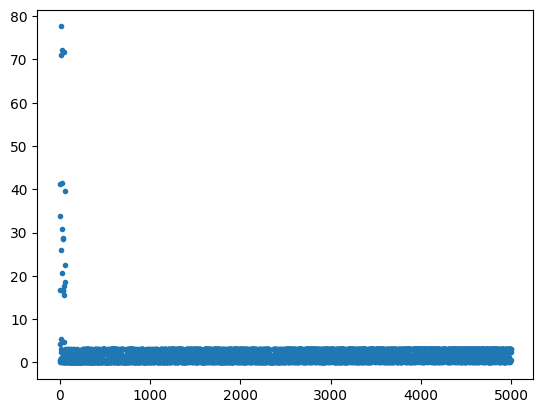

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(np.diff(times[0:5000]),'.')